In [ ]:
from map_gwas import *

In [ ]:
path_09 = 'Barcode09/medaka-variant-out/medaka.annotated.vcf'
path_10 = 'Barcode10/medaka-variant-out/medaka.annotated.vcf'
gwas = 'gwas_catalog.csv'
QUAL = 20
out_09 = f'output/barcode09-map-gwas-QUAL{QUAL}.csv'
out_10 = f'output/barcode10-map-gwas-QUAL{QUAL}.csv'

In [ ]:
map_gwas_snps(path_09, gwas, out_09, QUAL).map_report()

In [ ]:
import pandas as pd

df = pd.read_csv('in-house_report_test_annotated_gwas.csv')

In [ ]:
df['RISK ALLELE FREQUENCY']

In [ ]:
report_data = df[['DISEASE/TRAIT', 'RISK ALLELE FREQUENCY', 'P-VALUE']].groupby(
    'DISEASE/TRAIT', as_index=False
).agg({
    'RISK ALLELE FREQUENCY': 'max',
    'P-VALUE': 'min'
})

# Convert to numeric and handle non-numeric values
report_data['RISK ALLELE FREQUENCY'] = pd.to_numeric(report_data['RISK ALLELE FREQUENCY'], errors='coerce')

# Multiply by 100 to get percentages
report_data['RISK ALLELE FREQUENCY (%)'] = report_data['RISK ALLELE FREQUENCY'] * 100

# Drop rows with missing or invalid values
report_data.dropna(subset=['RISK ALLELE FREQUENCY (%)'], inplace=True)

In [ ]:
report_data

In [ ]:
df.dropna(subset=['DISEASE/TRAIT'], inplace=True)

In [ ]:
df.columns

In [ ]:
df

In [ ]:
df['DISEASE/TRAIT'].value_counts()

In [ ]:
from pygwas import MapGWASSNPs
mapper = MapGWASSNPs('Barcode09/medaka-variant-out/medaka.annotated.vcf', 'medaka-variant-out/gwas_catalog.csv', 'output/barcode09.csv')
annotated_df = mapper.map_report()
mapper.generate_report(annotated_df)

In [ ]:
import pandas as pd

gwas = pd.read_csv('alternative', sep='\t')

In [ ]:
gwas['DISEASE/TRAIT'].value_counts().to_csv('gwas_trait_counts.csv')

In [ ]:
gwas['DISEASE/TRAIT'].to_csv('gwas_traits.csv')

In [ ]:
gwas_disease = pd.DataFrame(gwas['DISEASE/TRAIT'].value_counts().reset_index())

In [ ]:
gwas_disease

In [ ]:
gwas_disease = pd.DataFrame(gwas['DISEASE/TRAIT'])

In [ ]:
gwas_disease.to_csv('gwas_disease_trait_groups.csv')

In [ ]:
group_keywords = {
    "Digestive system disease": ["digestive", "stomach", "intestinal", "colon", "gut", "esophageal", "bowel", "hepatic", "ulcer", "reflux", "IBS", "Crohn's disease", "colitis", "dyspepsia", "peptic", "gallstones"],
    "Cardiovascular disease": ["cardio", "heart", "vascular", "blood pressure", "hypertension", "artery", "stroke", "cholesterol", "arrhythmia", "coronary artery disease", "heart failure", "angina", "myocardial infarction", "atherosclerosis", "thrombosis", "aneurysm", "DVT", "pulmonary embolism"],
    "Metabolic disease": ["metabolic", "diabetes", "obesity", "insulin", "glucose", "metabolism", "metabolic syndrome", "hypothyroidism", "hyperthyroidism", "PCOS", "fatty liver disease", "hypoglycemia", "insulin resistance", "hyperinsulinism"],
    "Immune system disease": ["immune", "autoimmune", "immunoglobulin", "inflammatory", "allergic", "allergy", "asthma", "immunity", "cytokine", "IgA", "IgE", "IgG", "IgM", "lupus", "rheumatoid arthritis", "HIV", "multiple sclerosis", "Crohn's disease", "type 1 diabetes", "psoriasis", "eczema", "scleroderma", "Hashimoto's thyroiditis"],
    "Neurodevelopmental Disorder": ["autism", "ASD", "spectrum disorder", "ADHD", "learning disability", "intellectual disability", "developmental delay", "social communication", "developmental coordination disorder", "Asperger's syndrome", "Fragile X syndrome", "Rett syndrome", "Tourette's syndrome", "language disorder"],
    "Mental disorder": ["mental", "anxiety", "depression", "schizophrenia", "bipolar", "OCD", "PTSD", "phobia", "panic disorder", "eating disorder", "mood disorder", "personality disorder", "sleep disorder", "suicide", "stress", "addiction", "substance abuse", "psychosis", "dissociative disorder", "self-harm", "substance dependence"],
    "Nervous system disease": ["nervous", "neuro", "brain", "cognitive", "parkinson", "alzheimer", "epilepsy", "dementia", "seizure", "stroke", "multiple sclerosis", "ALS", "migraine", "headache", "neurodegenerative disease", "spinal cord injury"],
    "Liver disease": ["liver", "hepatic", "cirrhosis", "fibrosis", "liver failure", "Hepatitis", "hepatitis B", "hepatitis C", "NAFLD", "hepatocellular carcinoma", "liver fibrosis"],
    "Lipid or lipoprotein measurement": ["lipid", "cholesterol", "lipoprotein", "triglyceride", "fatty acid", "HDL", "LDL", "VLDL", "apolipoprotein", "lipoprotein(a)", "lipoprotein lipase"],
    "Inflammatory marker measurement": ["inflammatory", "CRP", "cytokine", "marker", "inflammation", "IL-6", "TNF-alpha", "interleukin", "ESR", "procalcitonin", "fibrinogen", "pentraxin-3"],
    "Hematological measurement": ["hematological", "blood cell", "hemoglobin", "platelet", "leukocyte", "erythrocyte", "anemia", "hematocrit", "WBC", "RBC", "hematopoiesis", "thrombocytopenia", "leukopenia", "polycythemia", "coagulation", "clotting factor", "blood disorders", "hemolysis", "sickle cell anemia", "hemophilia"],
    "Body measurement": ["height", "weight", "BMI", "body mass", "waist", "fat percentage", "bone density", "hip circumference", "body composition", "lean mass", "waist circumference", "waist-to-hip ratio", "fat mass", "muscle mass", "BMR", "body density", "body fat percentage", "bone mineral density", "body composition analysis"],
    "Cardiovascular measurement": ["cardiovascular", "ECG", "heart rate", "blood flow", "pulse", "arterial", "QT interval", "systolic", "diastolic", "blood pressure", "HRV", "arterial stiffness", "pulse pressure", "electrocardiogram", "echocardiogram", "carotid ultrasound", "heart function test", "myocardial perfusion"],
    "Other measurement": ["measurement", "biomarker", "assay", "quantification", "test", "screening", "diagnostic", "biomarker analysis", "genetic testing", "lab tests", "PCR", "ELISA", "PCR testing", "flow cytometry"],
    "Response to drug": ["drug", "pharma", "response", "medication", "treatment", "efficacy", "side effect", "therapy", "pharmacogenomics", "drug efficacy", "pharmacokinetics", "drug metabolism", "clinical trial", "therapeutic drug monitoring", "adverse drug reaction", "medication compliance", "personalized treatment", "treatment outcome"],
    "Biological process": ["biological", "pathway", "process", "genomic", "transcription", "translation", "protein expression", "cell signaling", "epigenetic", "cell differentiation", "apoptosis", "DNA repair", "cellular response", "protein folding", "mitochondrial function", "cell cycle", "gene expression", "metabolism", "signal transduction"],
    "Cancer": ["cancer", "tumor", "neoplasm", "carcinoma", "oncology", "melanoma", "leukemia", "lymphoma", "metastasis", "malignant", "Breast cancer", "prostate cancer", "lung cancer", "colorectal cancer", "sarcoma", "lymphoma", "glioblastoma", "brain tumor", "hepatocellular carcinoma", "ovarian cancer"],
    "Liver enzyme measurement": ["liver", "alanine", "aspartate", "enzyme", "hepatic", "bilirubin", "ALT", "AST", "GGT", "ALP", "bilirubin", "albumin", "PT"],
    "Other disease": ["disease", "syndrome", "condition", "disorder", "illness", "pathology", "chronic", "acute", "infection", "rare disease", "genetic disorder", "congenital disorder", "hereditary condition", "autoimmune disease", "genetic disorder", "syndrome", "pathology"]
}

In [ ]:
'''# Define mapping of keywords to groups
group_keywords = {
    "Digestive system disease": ["digestive", "stomach", "intestinal", "colon", "gut", "esophageal", "bowel", "hepatic"],
    "Cardiovascular disease": ["cardio", "heart", "vascular", "blood pressure", "hypertension", "artery", "stroke", "cholesterol"],
    "Metabolic disease": ["metabolic", "diabetes", "obesity", "insulin", "glucose", "metabolism", "metabolic syndrome"],
    "Immune system disease": ["immune", "autoimmune", "immunoglobulin", "inflammatory", "allergic", "allergy", "asthma", "immunity", "cytokine", "IgA", "IgE", "IgG", "IgM"],
    "Neurodevelopmental Disorder": [
        "autism", "ASD", "spectrum disorder", "ADHD", "learning disability", 
        "intellectual disability", "developmental delay", "social communication"
    ],
    "Mental disorder": [
        "mental", "anxiety", "depression", "schizophrenia", "bipolar", "OCD", 
        "PTSD", "phobia", "panic disorder", "eating disorder", "mood disorder", 
        "personality disorder", "sleep disorder", "suicide", "stress", "addiction", 
        "substance abuse"
    ],
    "Nervous system disease": [
        "nervous", "neuro", "brain", "cognitive", "parkinson", "alzheimer", 
        "epilepsy", "dementia", "seizure"
    ],
    "Liver disease": ["liver", "hepatic", "cirrhosis", "fibrosis", "liver failure", "Hepatitis"],
    "Lipid or lipoprotein measurement": ["lipid", "cholesterol", "lipoprotein", "triglyceride", "fatty acid", "HDL", "LDL", "VLDL", "apolipoprotein"],
    "Inflammatory marker measurement": ["inflammatory", "CRP", "cytokine", "marker", "inflammation", "IL-6", "TNF-alpha", "interleukin"],
    "Hematological measurement": ["hematological", "blood cell", "hemoglobin", "platelet", "leukocyte", "erythrocyte", "anemia", "hematocrit", "WBC", "RBC"],
    "Body measurement": ["height", "weight", "BMI", "body mass", "waist", "fat percentage", "bone density", "hip circumference", "body composition", "lean mass"],
    "Cardiovascular measurement": ["cardiovascular", "ECG", "heart rate", "blood flow", "pulse", "arterial", "QT interval", "systolic", "diastolic"],
    "Other measurement": ["measurement", "biomarker", "assay", "quantification", "test", "screening", "diagnostic"],
    "Response to drug": ["drug", "pharma", "response", "medication", "treatment", "efficacy", "side effect", "therapy", "pharmacogenomics"],
    "Biological process": ["biological", "pathway", "process", "genomic", "transcription", "translation", "protein expression", "cell signaling", "epigenetic"],
    "Cancer": ["cancer", "tumor", "neoplasm", "carcinoma", "oncology", "melanoma", "leukemia", "lymphoma", "metastasis", "malignant", "Breast cancer", "prostate cancer", "lung cancer", "colorectal cancer", 'sarcoma'],
    "Liver enzyme measurement": ["liver", "alanine", "aspartate", "enzyme", "hepatic", "bilirubin", "ALT", "AST", "GGT"],
    "Other disease": ["disease", "syndrome", "condition", "disorder", "illness", "pathology", "chronic", "acute"],
    "Other trait": []  # Default category for unclassified traits
}
'''

'''# Function to assign group based on keywords is contauined in the group_keywords dictionary
def assign_group(text): # text is the disease/trait column
    text = text.lower() # Convert to lowercase for case-insensitive matching
    for group, keywords in group_keywords.items(): # Iterate over the dictionary items
        for keyword in keywords: # Iterate over the list of keywords for each group 
            if keyword.lower() in text:
                return group
    return "Other trait"'''
    
group_keywords = {
    "Digestive system disease": [
        "digestive", "stomach", "intestinal", "colon", "gut", "esophageal", 
        "bowel", "hepatic", "ulcer", "reflux", "IBS", "Crohn's disease", 
        "colitis", "dyspepsia", "peptic", "gallstones"
    ],
    "Cardiovascular disease": [
        "cardio", "heart", "vascular", "blood pressure", "hypertension", "artery", 
        "stroke", "cholesterol", "arrhythmia", "coronary artery disease", "heart failure", 
        "angina", "myocardial infarction", "atherosclerosis", "thrombosis", "aneurysm", 
        "DVT", "pulmonary embolism"
    ],
    "Metabolic disease": [
        "metabolic", "diabetes", "obesity", "insulin", "glucose", "metabolism", 
        "metabolic syndrome", "hypothyroidism", "hyperthyroidism", "PCOS", 
        "fatty liver disease", "hypoglycemia", "insulin resistance", "hyperinsulinism"
    ],
    "Immune system disease": [
        "immune", "autoimmune", "immunoglobulin", "inflammatory", "allergic", "allergy", 
        "asthma", "immunity", "cytokine", "IgA", "IgE", "IgG", "IgM", "lupus", 
        "rheumatoid arthritis", "HIV", "multiple sclerosis", "Crohn's disease", "type 1 diabetes", 
        "psoriasis", "eczema", "scleroderma", "Hashimoto's thyroiditis"
    ],
    "Neurodevelopmental Disorder": [
        "autism", "ASD", "spectrum disorder", "ADHD", "learning disability", 
        "intellectual disability", "developmental delay", "social communication", 
        "developmental coordination disorder", "Asperger's syndrome", "Fragile X syndrome", 
        "Rett syndrome", "Tourette's syndrome", "language disorder"
    ],
    "Mental disorder": [
        "mental", "anxiety", "depression", "schizophrenia", "bipolar", "OCD", "PTSD", 
        "phobia", "panic disorder", "eating disorder", "mood disorder", "personality disorder", 
        "sleep disorder", "suicide", "stress", "addiction", "substance abuse", "psychosis", 
        "dissociative disorder", "self-harm", "substance dependence"
    ],
    "Nervous system disease": [
        "nervous", "neuro", "brain", "cognitive", "parkinson", "alzheimer", "epilepsy", 
        "dementia", "seizure", "stroke", "multiple sclerosis", "ALS", "migraine", "headache", 
        "neurodegenerative disease", "spinal cord injury"
    ],
    "Liver disease": [
        "liver", "hepatic", "cirrhosis", "fibrosis", "liver failure", "Hepatitis", "hepatitis B", 
        "hepatitis C", "NAFLD", "hepatocellular carcinoma", "liver fibrosis"
    ],
    "Lipid or lipoprotein measurement": [
        "lipid", "cholesterol", "lipoprotein", "triglyceride", "fatty acid", "HDL", "LDL", 
        "VLDL", "apolipoprotein", "lipoprotein(a)", "lipoprotein lipase"
    ],
    "Inflammatory marker measurement": [
        "inflammatory", "CRP", "cytokine", "marker", "inflammation", "IL-6", "TNF-alpha", 
        "interleukin", "ESR", "procalcitonin", "fibrinogen", "pentraxin-3"
    ],
    "Hematological measurement": [
        "hematological", "blood cell", "hemoglobin", "platelet", "leukocyte", "erythrocyte", 
        "anemia", "hematocrit", "WBC", "RBC", "hematopoiesis", "thrombocytopenia", "leukopenia", 
        "polycythemia", "coagulation", "clotting factor", "blood disorders", "hemolysis", 
        "sickle cell anemia", "hemophilia"
    ],
    "Body measurement": [
        "height", "weight", "BMI", "body mass", "waist", "fat percentage", "bone density", 
        "hip circumference", "body composition", "lean mass", "waist circumference", "waist-to-hip ratio", 
        "fat mass", "muscle mass", "BMR", "body density", "body fat percentage", "bone mineral density", 
        "body composition analysis"
    ],
    "Cardiovascular measurement": [
        "cardiovascular", "ECG", "heart rate", "blood flow", "pulse", "arterial", "QT interval", 
        "systolic", "diastolic", "blood pressure", "HRV", "arterial stiffness", "pulse pressure", 
        "electrocardiogram", "echocardiogram", "carotid ultrasound", "heart function test", "myocardial perfusion"
    ],
    "Other measurement": [
        "measurement", "biomarker", "assay", "quantification", "test", "screening", "diagnostic", 
        "biomarker analysis", "genetic testing", "lab tests", "PCR", "ELISA", "PCR testing", "flow cytometry"
    ],
    "Response to drug": [
        "drug", "pharma", "response", "medication", "treatment", "efficacy", "side effect", 
        "therapy", "pharmacogenomics", "drug efficacy", "pharmacokinetics", "drug metabolism", 
        "clinical trial", "therapeutic drug monitoring", "adverse drug reaction", "medication compliance", 
        "personalized treatment", "treatment outcome"
    ],
    "Biological process": [
        "biological", "pathway", "process", "genomic", "transcription", "translation", "protein expression", 
        "cell signaling", "epigenetic", "cell differentiation", "apoptosis", "DNA repair", "cellular response", 
        "protein folding", "mitochondrial function", "cell cycle", "gene expression", "metabolism", 
        "signal transduction"
    ],
    "Cancer": [
        "cancer", "tumor", "neoplasm", "carcinoma", "oncology", "melanoma", "leukemia", "lymphoma", 
        "metastasis", "malignant", "Breast cancer", "prostate cancer", "lung cancer", "colorectal cancer", 
        "sarcoma", "lymphoma", "glioblastoma", "brain tumor", "hepatocellular carcinoma", "ovarian cancer"
    ],
    "Liver enzyme measurement": [
        "liver", "alanine", "aspartate", "enzyme", "hepatic", "bilirubin", "ALT", "AST", "GGT", "ALP", 
        "bilirubin", "albumin", "PT"
    ],
    "Other disease": [
        "disease", "syndrome", "condition", "disorder", "illness", "pathology", "chronic", "acute", 
        "infection", "rare disease", "genetic disorder", "congenital disorder", "hereditary condition", 
        "autoimmune disease", "genetic disorder", "syndrome", "pathology"
    ],
    "Other trait": []  # Default category for unclassified traits
}

def assign_group(disease_trait):
    for group, keywords in group_keywords.items():
        for keyword in keywords:
            if keyword.lower() in disease_trait.lower():
                return group
    return "Other trait"

# Apply the function to create the new column
gwas['Groups of Disease/Trait'] = gwas['DISEASE/TRAIT'].apply(assign_group)

gwas.to_csv('gwas_catalog_grouped.csv')
# Display a sample of the updated dataset
gwas.head()

In [ ]:
gwas.to_csv('data/gwas_database.csv', index=False)

In [ ]:
gwas['Groups of Disease/Trait'].unique()

In [ ]:
col = ['Other trait', 
       'Mental disorder', 
       'Cancer',
       'Immune system disease', 
       'Metabolic disease',
       'Digestive system disease', 
       'Hematological measurement',
       'Response to drug', 
       'Lipid or lipoprotein measurement',
       'Cardiovascular disease', 
       'Nervous system disease',
       'Body measurement', 
       'Liver disease', 
       'Neurodevelopmental Disorder',
       'Inflammatory marker measurement', 
       'Other disease',
       'Liver enzyme measurement', 
       'Cardiovascular measurement',
       'Other measurement', 
       'Biological process']

In [ ]:


# Add an Icon column to the dataset
gwas['Icon'] = gwas['Groups of Disease/Trait'].map(icon_mapping)

# Display updated dataset
gwas.head()

In [ ]:
gwas.to_csv('gwas_catalog_grouped.csv', index=False)

In [ ]:
gwas_disease.to_csv('gwas_disease_trait_groups.csv')

In [ ]:
gwas_disease['Groups of Disease/Trait'].unique()

In [ ]:
gwas_disease

In [ ]:
import plotly.express as px
#Create a DataFrame linspace of 100 values

import numpy as np
import pandas as pd
import plotly.express as px
#Create a DataFrame linspace of 100 values
df = pd.DataFrame(np.linspace(0, 100, 100), columns=['Values'])


In [ ]:
str_test = "Biological process"

In [ ]:
with open("data/Group of disease traits/Biological process.svg", "r", encoding="utf-8") as file:
    img = file.read()

print(str(img))

In [ ]:
test = f"{img}"

In [ ]:
test

In [ ]:
img

In [ ]:
import plotly.io as pio

In [ ]:
svg_bytes = pio.to_image(img, format="svg")
svg_string = svg_bytes.decode("utf-8")

In [ ]:
import pyperclip

pyperclip.copy(img)  # Copy text to clipboard

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

z_ = np.linspace(0, 100, 100)

fig.add_trace(go.Heatmap(
    z=[z_],
    colorscale=[
        #Create color scale 0-100 with 100 steps from blue to red
        [0, '#008AA5'],
        [1, '#F1423E']
        ],
    showscale=False,
    colorbar=dict(
        tick0=0,
        dtick=1
    )

))

#X scale from 0 to 100
fig.update_layout(
    xaxis=dict(
        range=[0, 100]
    )
)

#X-axis title
fig.update_layout(
    xaxis_title="Risk Allele Frequency (%)",
)
#Add triangle-down marker at 50 on the x-axis and 0 on the y-axis with size 30 and black color
fig.add_trace(go.Scatter(
    x=[50],
    y=[0.5],
    mode='markers',
    marker=dict(
        symbol='triangle-down',
        size=50,
        color='black'
    )
))

#Add line at 50 on the x-axis with width 2 and black color

#set size of the plot
fig.update_layout(
    width=1000,
    height=300
)

#Gide y-axis
fig.update_layout(
    yaxis=dict(
        visible=False,
    ),
    showlegend=False,
    xaxis=dict(
        showgrid=False,
        zeroline=False
        ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)


fig.update_layout(
    font=dict(
        size=16,  
    )
)

#optimise margin
fig.update_layout(
    margin=dict(
        l=0,
        r=300,
        b=300,
        t=300,
        pad=0
    )
)

fig.show()

In [ ]:
str_p = pio.to_image(fig, format="svg")

In [ ]:
str_p.decode("utf-8")

In [ ]:

fig = px.bar(df, y="continent", x="pop", color="lifeExp", orientation="h",
             color_continuous_scale='Bluered_r', hover_name="country")

fig.show()

In [ ]:
barcode = ['Barcode09', 'Barcode10']
filter_Q = [0, 10, 20]
gwas_file = "gwas_catalog_grouped.csv"

for i in barcode:
    for j in filter_Q:
        path = f'{i}/medaka-variant-out/medaka.annotated.vcf'
        out = f'{i}-map-gwas-QUAL{j}'

        mapper = MapGWASSNPs(path, gwas_file, out, cut_off_qual=j, filt_nr_disease=True)
        annotated_df = mapper.map_snps()
        mapper.generate_report()

In [ ]:
import pandas as pd
import gwaspy

# Function to search for disease/trait description based on SNP
def get_trait_description(snp_id):
    try:
        # Search for the SNP in the GWAS Catalog using gwaspy
        result = gwaspy.search(snp=snp_id)
        
        if result:
            # Extracting the trait or disease description
            description = result[0].get('trait', 'No description found')
        else:
            description = 'No description found'
        
        return description
    except Exception as e:
        print(f"Error fetching data for SNP {snp_id}: {e}")
        return 'Error fetching description'

# Example SNP dataset (replace this with your actual dataset)
data = {
    'SNP': ['rs1234', 'rs5678', 'rs91011'],  # Example SNP IDs
    'Other_Column': [1.2, 3.4, 5.6]
}

# Create a DataFrame from your SNP dataset
df = pd.DataFrame(data)

# Create a new column with the trait descriptions for each SNP
df['Trait_Description'] = df['SNP'].apply(get_trait_description)

# Display the updated DataFrame
print(df)

In [ ]:
!pip3 install gwaspy

In [ ]:
import requests
from bs4 import BeautifulSoup

# Function to fetch the EFO ID from the GWAS Catalog search page for a given trait
def fetch_efo_id(trait_name):
    base_url = "https://www.ebi.ac.uk/gwas/rest/api/search"
    params = {"query": trait_name}
    
    try:
        # Make a request to the GWAS Catalog search API
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        
        # Parse the response JSON to extract EFO ID
        data = response.json()
        if 'response' in data and 'docs' in data['response']:
            docs = data['response']['docs']
            if docs:
                # Extract the first document's EFO ID (if it exists)
                efo_id = docs[0].get('efo_trait', None)
                if efo_id:
                    return efo_id
        return None

    except requests.exceptions.RequestException as err:
        print(f"Error fetching data: {err}")
        return None

# Function to scrape the description from the EFO trait page
def fetch_description_from_efo_page(efo_id):
    url = f"https://www.ebi.ac.uk/gwas/efotraits/{efo_id}"
    
    try:
        # Request the EFO trait page
        response = requests.get(url)
        response.raise_for_status()
        
        # Parse the HTML page using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract the description of the trait from the page (assuming it's within a specific tag, e.g., <p>)
        description_tag = soup.find('div', class_='panel-body')
        if description_tag:
            description = description_tag.get_text(strip=True)
            return description
        
        return "Description not found."
    
    except requests.exceptions.RequestException as err:
        print(f"Error fetching EFO page: {err}")
        return "Error fetching description"

# Example usage
trait_name = "Response to radiotherapy in cancer (late toxicity)"

# Step 1: Fetch the EFO ID for the trait
efo_id = fetch_efo_id(trait_name)

if efo_id:
    print(f"EFO ID for '{trait_name}': {efo_id}")
    
    # Step 2: Fetch the description from the EFO page using the EFO ID
    description = fetch_description_from_efo_page(efo_id)
    print(f"Description for '{trait_name}': {description}")
else:
    print(f"EFO ID not found for '{trait_name}'.")

In [ ]:
!pip3 install beautifulsoup4

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('alternative', sep='\t')
df2 = pd.read_csv('data/gwas_catalog_grouped.csv', index_col=0)

In [ ]:
df['CONTEXT'].value_counts()

In [ ]:
def check_snp_type_gwas(reference, sample):
    # Check if it's an SNP (Single-Nucleotide Polymorphism)
    if len(reference) == 1 and len(sample) == 1:
        if reference != sample:
            return "SNP"
    
    # Check if it's an Insertion
    elif len(reference) < len(sample):
        if reference == sample[:len(reference)]:
            return "Insertion"
    
    # Check if it's a Deletion
    elif len(reference) > len(sample):
        if sample == reference[:len(sample)]:
            return "Deletion"
    
    # Check if it's an MNP (Multiple-Nucleotide Polymorphism)
    elif len(reference) == len(sample):
        if reference != sample:
            return "MNP"
    
    # Check if it's a Complex Variation (MIXED: SNP+InDel, or others)
    elif len(reference) != len(sample):
        return "Complex Variation"
    
    return "Unknown"

# Example usage:
print(check_snp_type_gwas('A', 'C'))           # SNP
print(check_snp_type_gwas('A', 'AGT'))         # Insertion
print(check_snp_type_gwas('AC', 'C'))          # Deletion
print(check_snp_type_gwas('ATA', 'GTC'))       # MNP
print(check_snp_type_gwas('ATA', 'GTCAGT'))    # Complex Variation

In [ ]:
df3 = df2.loc[:, ['CHR_POS', 'MAPPED_TRAIT', 'STUDY ACCESSION', 'GENOTYPING TECHNOLOGY']]

In [ ]:
df.columns, df2.columns

In [ ]:
common_columns = list(set(df.columns) & set(df2.columns))

In [ ]:
df.shape

In [ ]:
df2.shape

In [ ]:
df2.shape, df3.shape, df2.shape[0] + df3.shape[0]

In [ ]:
import pandas as pd

# Merge on a common key (adjust as needed)
df4 = pd.merge(df2, df3, on='CHR_POS', how='inner')



In [ ]:
df4.shape

In [ ]:
df4.to_csv('merged_gwas_data_outer.csv', index=False)

In [ ]:
df3.shape

In [ ]:
df3

In [ ]:
df4 = df3.drop(df3[df3['RISK ALLELE FREQUENCY'] == "NR"].index)

In [ ]:
df4

In [ ]:
ALLELE = df4['STRONGEST SNP-RISK ALLELE'].str.split('-', expand=True)[1]

In [ ]:
ALLELE.shape

In [ ]:
df4.shape

In [ ]:
df4.insert(20, 'ALLELE', ALLELE)

In [ ]:
df4.columns

In [ ]:
vcf_df = pd.read_csv('data/medaka.annotated.vcf', comment="#", sep=r'\s+', names=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT", "SAMPLE"])

In [ ]:
df4

In [ ]:
df4[df4['CHR_POS'] == 94165]

In [ ]:
vcf_df

In [ ]:
#read vcf file
with open(vcf_file, 'r') as f:
    lines = f.readlines()
    #skip header
    for line in lines:
        if line.startswith('#CHROM'):
            break
    #parse the data
    data = []
    for line in lines:
        if not line.startswith('#'):
            data.append(line.strip().split('\t'))
            #print the data
            printdf['MAPPED_TRAIT_URI(data)
            

In [ ]:
import pandas as pd

df = pd.read_csv('data/gwas_database.csv')


In [ ]:
df['MAPPED_TRAIT_URI']

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# Set up the Safari WebDriver
driver = webdriver.Safari()

# Open the website
url = "http://www.ebi.ac.uk/efo/EFO_0004761"
driver.get(url)

# Wait for the content to load (you can adjust the time if needed)
driver.implicitly_wait(5)  # seconds

# Find the <p> tag with class 'pb-3' and get the text
p_tag = driver.find_element(By.CSS_SELECTOR, "p.pb-3")
text = p_tag.text

print(text)

# Close the driver
driver.quit()

In [ ]:
!pip3 install webdriver_manager


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, WebDriverException
from tqdm import tqdm
import pandas as pd

# Load the data
df = pd.read_csv('data/gwas_database.csv')

url_ = []
description = []

for i in tqdm(df['MAPPED_TRAIT_URI'].unique()):
    if i == 'No URI':
        description.append('Description not available')
        continue
    
    try:
        # Set up the Safari WebDriver
        driver = webdriver.Safari()
        driver.get(i)
        driver.implicitly_wait(300)  # Wait for the content to load

        # Extract the description
        p_tag = driver.find_element(By.CSS_SELECTOR, "p.pb-3")
        text = p_tag.text
        
        url_.append(i)
        description.append(text)
    
    except NoSuchElementException:
        description.append('Description not found')
    except WebDriverException:
        description.append('WebDriver error occurred')
    except Exception as e:
        description.append(f'Error: {str(e)}')
    
    finally:
        driver.quit()
    
# Create a mapping dictionary
dict_ = dict(zip(url_, description))

# Map the descriptions to the original dataframe
df['MAPPED_TRAIT_DESCRIPTION'] = df['MAPPED_TRAIT_URI'].map(dict_)

df.to_csv('data/gwas_database_with_description.csv', index=False)


In [ ]:
df= pd.read_csv('data/gwas_database.csv')

In [ ]:
df['MAPPED_TRAIT_URI'].unique()[16], df['MAPPED_TRAIT_URI'].unique()[15], df['MAPPED_TRAIT_URI']

In [ ]:
df['MAPPED_TRAIT_URI'].str.split('/').str[-1].str.split('_').str[0].unique()

In [ ]:
for i in ['EFO', 'MONDO', 'GO', 'OBA', 'HP', 'No URI', 'Orphanet', 'NCIT', 'HANCESTRO', 'PATO', 'MP']:

    test = df[df['MAPPED_TRAIT_URI'].str.split('/').str[-1].str.split('_').str[0].str.contains(i)]['MAPPED_TRAIT_URI'].reset_index(drop=True)
    print(i, test.shape)

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, WebDriverException
from tqdm import tqdm
import pandas as pd


url = 'http://purl.obolibrary.org/obo/GO_0097336'

OLS = ['EFO', 'MONDO', 'Orphanet']
Abigo = ['GO']
Ontobee = ['OBA', 'NCIT', 'HANCESTRO', 'PATO', 'MP']
HPO = ['HP']


driver = webdriver.Safari()
driver.get(url)
driver.implicitly_wait(300)  # Wait for the content to load
if url.split('/')[-1].split('_')[0] in OLS:
    print(url.split('/')[-1].split('_')[0])
    # Set up the Safari WebDriver
    # Extract the description
    p_tag = driver.find_element(By.CSS_SELECTOR, "p.pb-3")
    text = p_tag.text
elif url.split('/')[-1].split('_')[0] in Abigo:
    print(url.split('/')[-1].split('_')[0])
    # Set up the Safari WebDriver
    # Extract the description
    p_tag = driver.find_element(By.XPATH, "//meta[@name='description']").get_attribute("content")
    text = p_tag
print(text)

driver.quit()

In [ ]:
df2 = pd.read_csv('data/gwas_database.csv.gz', compression='gzip')

In [ ]:
import pandas as pd
df = pd.read_csv('data/gwas_database.csv')  
for i in df['MAPPED_TRAIT_URI'].str.split('/').str[-1].str.split('_').str[0].unique():

    print(df[df['MAPPED_TRAIT_URI'].str.split('/').str[-1].str.split('_').str[0].str.contains(i)]['MAPPED_TRAIT_URI'].to_list()[1])

In [ ]:
test

In [ ]:
df[df['MAPPED_TRAIT_URI'].str.split('/').str[-1].str.split('_').str[0].str.contains('EFO')]['MAPPED_TRAIT_URI'][0],
df[df['MAPPED_TRAIT_URI'].str.split('/').str[-1].str.split('_').str[0].str.contains('MONDO')]['MAPPED_TRAIT_URI'][11],
df[df['MAPPED_TRAIT_URI'].str.split('/').str[-1].str.split('_').str[0].str.contains('GO')]['MAPPED_TRAIT_URI'],

In [ ]:
df[df['MAPPED_TRAIT_URI'].str.contains('www.orpha.net')]

In [ ]:
df['MAPPED_TRAIT_URI'].str.split('/').str[].unique()

In [48]:
#Create dict url: description
description = ['A', 'B', 'C']
num = [1, 2, 3]

dict_ = dict(zip(num, description))

In [49]:
dict_

{1: 'A', 2: 'B', 3: 'C'}

In [ ]:
df['MAPPED_TRAIT_URI'].isnull().sum()

In [ ]:
# Plint blank if df['MAPPED_TRAIT_URI'] is null
for i in df['MAPPED_TRAIT_URI'].index:
    if pd.isnull(df['MAPPED_TRAIT_URI'][i]):
        df['MAPPED_TRAIT_URI'][i] = 'No URI'


In [ ]:
df.to_csv('data/gwas_database.csv', index=False)

In [ ]:
df['MAPPED_TRAIT_URI'].value_counts()

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, WebDriverException
from tqdm import tqdm
import pandas as pd

# Load the data


url_ = []
description = []
i = 'http://purl.obolibrary.org/obo/HP_0000483'
try:
    # Set up the Safari WebDriver
    driver = webdriver.Safari()
    driver.get(i)
    driver.implicitly_wait(3)  # Wait for the content to load

    # Extract the description
    text = driver.find_element(By.XPATH, "/html/body/app-root/mat-sidenav-container/mat-sidenav-content/div/app-term/div/div/div/div[2]/mat-card/mat-card-content/div/div[2]/p").text
    
    url_.append(i)
    description.append(text)

except NoSuchElementException:
    description.append('Description not found')
except WebDriverException:
    description.append('WebDriver error occurred')
except Exception as e:
    description.append(f'Error: {str(e)}')

finally:
    driver.quit()
    
print(description)

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, WebDriverException
from tqdm import tqdm
import pandas as pd

# Load the data


url_ = []
description = []
i = 'http://purl.obolibrary.org/obo/GO_0097336'
try:
    # Set up the Safari WebDriver
    driver = webdriver.Safari()
    driver.get(i)
    driver.implicitly_wait(3)  # Wait for the content to load

    # Extract the description
    text = driver.find_element(By.XPATH, "//dt[contains(text(), 'Definition')]/following-sibling::dd").text
    
    url_.append(i)
    description.append(text)

except NoSuchElementException:
    description.append('Description not found')
except WebDriverException:
    description.append('WebDriver error occurred')
except Exception as e:
    description.append(f'Error: {str(e)}')

finally:
    driver.quit()
    
print(description)

In [ ]:
df2 = pd.read_csv('data/gwas_database.csv.gz', compression='gzip', low_memory=False)

In [ ]:
df2['CHR_POS']

In [ ]:
text.split('\n')[0]

In [ ]:
df = pd.read_csv('data/gwas_database.csv.gz', compression='gzip')

In [ ]:
df['MAPPED_TRAIT_URI'].value_counts().to_clipboard()

In [ ]:
df = pd.read_csv('data/gwas_database_with_description.csv.gz', compression='gzip')

In [ ]:
df['MAPPED_TRAIT_DESCRIPTION'].value_counts()

In [ ]:
ols = ['EFO', 'MONDO', 'Orphanet']
amigo = ['GO']
ontobee = ['OBA', 'NCIT', 'HANCESTRO', 'PATO', 'MP']
hpo = ['HP']


In [ ]:
df['MAPPED_TRAIT_URI'][0].split('/')[-1].split('_')[0]

In [ ]:
df['MAPPED_TRAIT_URI'].unique()[0].split('/')[-1].split('_')[0]

In [ ]:
df2 = pd.read_csv('data/gwas_database_with_description.csv.gz', compression='gzip')

In [ ]:
import pandas as pd
df = pd.read_csv('data/gwas_database.csv.gz', compression='gzip')  
for i in df['MAPPED_TRAIT_URI'].str.split('/').str[-1].str.split('_').str[0].unique():

    print(df[df['MAPPED_TRAIT_URI'].str.split('/').str[-1].str.split('_').str[0].str.contains(i)]['MAPPED_TRAIT_URI'].to_list()[1])

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up the Safari WebDriver
driver = webdriver.Safari()

# Open the target webpage
url = "https://ontobee.org/ontology/NCIT?iri=http://purl.obolibrary.org/obo/NCIT_C117245"
driver.get(url)

try:
    # Wait until the definition container is loaded
    definition_element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, "//*[@id='mainbody']/div[2]"))  # Adjust XPath if necessary
    )

    # Extract the definition text
    definition_text = definition_element.text
    print("Definition:", definition_text)

except Exception as e:
    print("Error:", e)

finally:
    # Close the browser
    driver.quit()

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
# Open the target webpage
url = "https://hpo.jax.org/browse/term/HP:0000483"  # Replace with the actual URL
#driver.get(url)

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up the Selenium WebDriver
driver = webdriver.Safari()  # Ensure your browser driver is correctly set up


driver.get(url)

try:
    # Wait for the parent div and locate the <p> tag inside it
    description_element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, "/html/body/app-root/mat-sidenav-container/mat-sidenav-content/div/app-term/div/div/div/div[2]/mat-card/mat-card-content/div/div[2]/p"))
    )

    # Extract the text content from the <p> tag
    description_text = description_element.text
    print("Description:", description_text)
except Exception as e:
    print("Error:", e)
finally:
    # Close the browser
    driver.quit()
    

In [ ]:
import pandas as pd

df = pd.read_csv('data/gwas_database_with_description.csv.gz', compression='gzip')

In [ ]:
set(df['MAPPED_TRAIT_URI'].dropna())

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, WebDriverException
from tqdm import tqdm
import pandas as pd

url = 'http://purl.obolibrary.org/obo/NCIT_C117245'
    # Set up the Safari WebDriver
driver = webdriver.Safari()
driver.get(url)
driver.implicitly_wait(300)  # Wait for the content to load

# Extract the description
p_tag = driver.find_element(By.XPATH, "//div[@class='def']//span[@class='label'][contains(text(), 'Definition:')]")
text = p_tag.text

print(text)


driver.quit()



In [ ]:

import pandas as pd
df = pd.read_csv('data/gwas_database.csv.gz', compression='gzip', low_memory=False)  

In [ ]:
df['MAPPED_TRAIT_URI'].str.split('/').str[-1].str.split('_').str[0].value_counts()

In [ ]:
import pandas as pd
df2 = pd.read_csv('data/gwas_database_with_description.csv.gz', compression='gzip', low_memory=False)

In [ ]:
df2['MAPPED_TRAIT_DESCRIPTION'].value_counts().to_csv('data/gwas_description_counts.csv')

In [ ]:
# Create list of 'Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description' and NaN
list_of_reprocess = ['Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description']


df2[df2['MAPPED_TRAIT_DESCRIPTION'].isin(list_of_reprocess) | df2['MAPPED_TRAIT_DESCRIPTION'].isnull()]['MAPPED_TRAIT_DESCRIPTION'].value_counts()

In [ ]:
# Create list of 'Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description' and NaN
list_of_reprocess = ['Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description']


#df2[df2['MAPPED_TRAIT_DESCRIPTION'].isin(list_of_reprocess) | df2['MAPPED_TRAIT_DESCRIPTION'].isnull()]['MAPPED_TRAIT_DESCRIPTION'].value_counts()
# qhat if is not in the list
df2[~df2['MAPPED_TRAIT_DESCRIPTION'].isin(list_of_reprocess) | df2['MAPPED_TRAIT_DESCRIPTION'].notnull()]['MAPPED_TRAIT_DESCRIPTION'].value_counts().sum()

In [9]:
import pandas as pd
df2 = pd.read_csv('data/gwas_database_with_description.csv.gz', compression='gzip', low_memory=False)  

In [10]:
# Create list of 'Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description' and NaN
list_of_reprocess = ['Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description']


df2[df2['MAPPED_TRAIT_DESCRIPTION'].isin(list_of_reprocess) | df2['MAPPED_TRAIT_DESCRIPTION'].isnull()]['MAPPED_TRAIT_DESCRIPTION'].value_counts()

MAPPED_TRAIT_DESCRIPTION
Ontology not covered         20000
Description not available    10369
Description not found         7036
WebDriver error occurred      4132
Name: count, dtype: int64

In [11]:
# Create list of 'Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description' and NaN
list_of_reprocess = ['Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description']


#df2[df2['MAPPED_TRAIT_DESCRIPTION'].isin(list_of_reprocess) | df2['MAPPED_TRAIT_DESCRIPTION'].isnull()]['MAPPED_TRAIT_DESCRIPTION'].value_counts()
# qhat if is not in the list
df2[~df2['MAPPED_TRAIT_DESCRIPTION'].isin(list_of_reprocess) | df2['MAPPED_TRAIT_DESCRIPTION'].notnull()]['MAPPED_TRAIT_DESCRIPTION'].value_counts().sum()

716876

In [ ]:
df2['MAPPED_TRAIT_DESCRIPTION'].isnull().sum()

In [ ]:
df2['MAPPED_TRAIT_DESCRIPTION'].to_csv('data/gwas_description.csv')

In [ ]:
df2[df2['MAPPED_TRAIT_DESCRIPTION'] == 'Description not found']['MAPPED_TRAIT_URI'].to_csv('data/Description_not_found.csv', index=False)

In [ ]:
df2['MAPPED_TRAIT_DESCRIPTION'].isnull().sum()

In [ ]:
for i in df['MAPPED_TRAIT_URI'].str.split('/').str[-1].str.split('_').str[0].unique():

    print(df[df['MAPPED_TRAIT_URI'].str.split('/').str[-1].str.split('_').str[0].str.contains(i)]['MAPPED_TRAIT_URI'].to_list()[1])


In [ ]:
for index, x in enumerate(df2['MAPPED_TRAIT_URI'].dropna().unique()):
    if df2['MAPPED_TRAIT_DESCRIPTION'][index] in list_of_reprocess:
        

In [ ]:
len(df2.loc[55520, 'MAPPED_TRAIT_URI'].split(','))

In [27]:
import pandas as pd
vcf = pd.read_csv('data/medaka.annotated.vcf', comment="#", sep=r'\s+', names=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT", "SAMPLE"])

In [28]:
vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr1,94163,.,C,G,25.324,PASS,"DP=1;DPS=1,0",GT:GQ,1:25
1,chr1,94165,.,A,AAG,66.188,PASS,"DP=1;DPS=1,0",GT:GQ,1:66
2,chr1,94323,.,C,AT,22.004,PASS,"DP=1;DPS=1,0",GT:GQ,1:22
3,chr1,94334,.,TT,CA,2.542,PASS,"DP=1;DPS=1,0",GT:GQ,1:3
4,chr1,94537,.,A,G,10.512,PASS,"DP=1;DPS=1,0",GT:GQ,1:11
...,...,...,...,...,...,...,...,...,...,...
453466,chrY,56876674,.,C,T,18.467,PASS,"DP=1.0;DPS=1.0,0.0",GT:GQ,1:18
453467,chrY,56876675,.,A,AC,16.263,PASS,"DP=1.0;DPS=1.0,0.0",GT:GQ,1:16
453468,chrY,56876681,.,G,A,19.102,PASS,"DP=1.0;DPS=1.0,0.0",GT:GQ,1:19
453469,chrY,56876684,.,T,C,2.094,PASS,"DP=1.0;DPS=1.0,0.0",GT:GQ,1:2


In [31]:
vcf[vcf['TYPE'] == 'Deletion']

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,TYPE
63,chr1,839457,.,TC,T,4.492,PASS,"DP=1.0;DPS=1.0,0.0",GT:GQ,1:4,Deletion
68,chr1,839470,.,CACCTAGACACACACACCTGGACAAACACA,C,92.882,PASS,"DP=1.0;DPS=1.0,0.0",GT:GQ,1:93,Deletion
123,chr1,1732892,.,CTTT,C,2.859,PASS,"DP=1.0;DPS=1.0,0.0",GT:GQ,1:3,Deletion
890,chr1,3435335,.,GGTGA,G,10.714,PASS,"DP=1.0;DPS=1.0,0.0",GT:GQ,1:11,Deletion
918,chr1,4157085,.,GA,T,0.678,PASS,"DP=1;DPS=0,1",GT:GQ,1:1,Deletion
...,...,...,...,...,...,...,...,...,...,...,...
453274,chrY,56835061,.,CTCCACTCCACTCCATTCCACTCCATCCCATTCCA,G,90.672,PASS,"DP=1.0;DPS=0.0,1.0",GT:GQ,1:91,Deletion
453327,chrY,56835428,.,TTCC,AAA,5.285,PASS,"DP=1.0;DPS=0.0,1.0",GT:GQ,1:5,Deletion
453328,chrY,56835433,.,GTC,T,8.517,PASS,"DP=1.0;DPS=0.0,1.0",GT:GQ,1:9,Deletion
453392,chrY,56849119,.,AC,T,1.496,PASS,"DP=1.0;DPS=0.0,1.0",GT:GQ,1:1,Deletion


In [ ]:
import numpy as np
# Function to classify variant type
def classify_variant(ref, alt):
    ref_len = len(ref)
    alt_len = len(alt)

    if ref_len == 1 and alt_len == 1:
        return "SNPs"
    elif ref_len < alt_len:
        return "Insertion"
    elif ref_len > alt_len:
        return "Deletion"
    else:
        return "Complex Variation"

# Apply classification to the DataFrame
vcf["TYPE"] = vcf.apply(lambda row: classify_variant(row["REF"], row["ALT"]), axis=1)

# Count occurrences of each variant type
variant_counts = vcf["TYPE"].value_counts()
#variant_counts
variant_counts_percent = np.round(variant_counts / len(vcf) * 100, decimals=2)

In [34]:
variant_counts.sort_index()

TYPE
Complex Variation     72046
Deletion               4371
Insertion            128169
SNPs                 248885
Name: count, dtype: int64

In [33]:
variant_counts_percent.sort_index()

TYPE
Complex Variation    15.89
Deletion              0.96
Insertion            28.26
SNPs                 54.88
Name: count, dtype: float64

In [51]:
import plotly.graph_objects as go

for i in variant_counts_percent.index:    
    # Data for the single progress bar
    value = variant_counts_percent[i]  # Percentage of progress
    color = {'Complex Variation':'FF9999', 'Deletion':'FF7F3E', 'Insertion':'3D527D', 'SNPs':'FFB854'}  # Custom color for progress
    label = f"<b>{variant_counts[i]} Positions in your genetic</b>"  # Label for the progress bar
    #description = "DUIS AUTE IRURE DOL ORIN REPREHENDERIT IN VELIT ESSE CILLUM FUGIAT NULLA PARI"

    # Create the pie chart (donut chart)
    fig = go.Figure(go.Pie(
        values=[value, 100 - value],  # Progress and remaining part
        labels=["", ""],  # Hide labels
        hole=0.6,  # Creates a donut shape
        direction="clockwise",
        marker=dict(colors=[color[i], "lightgray"]),  # Custom color and gray for remaining
        textinfo="none",  # Hide Pie chart labels
        showlegend=False
    ))

    # Add percentage text inside the donut chart
    fig.add_annotation(
        text=f"<b>{value}%</b>", showarrow=False,
        xref="paper", yref="paper",
        x=0.5, y=0.5, font=dict(size=24)
    )

    # Add label below the chart
    fig.add_annotation(
        text=f"<b>{label}</b>", showarrow=False,
        xref="paper", yref="paper",
        x=0.5, y=-0.15, font=dict(size=14, color="black")
    )

    # Layout adjustments
    fig.update_layout(
        title=f"<b>{i}</b>",
        height=400, width=400,
        showlegend=False
    )

    #Set title to center and below of the chart
    fig.update_layout(
        title_x=0.5,
        title_y=0.05
    )
    fig.update_layout(
        title_x=0.5
    )

    #Background transparency
    fig.update_layout(
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)'
    )

    # adjust 3D aspect
    fig.update_layout(
        scene=dict(
            aspectmode='data'
        )
    )


    # Display the figure
    fig.show()

In [ ]:
df2[['CHR_ID','CHR_POS']].sort_values(by='CHR_POS').to_csv('data/CHR_POS.csv', index=False)

In [ ]:
#Normalise the chromosome ID
df2['CHR_ID'].str.split(' ')[0]

In [ ]:
df2['CHR_ID'].value_counts().to_csv('data/CHR_ID_counts.csv')

In [ ]:
#Check SNPs, Insertions, Deletions, MNPs, Complex Variations
snps = []
insertions = []
deletions = []
mnp = []
complex_variations = []
for record in vcf_reader:
    for info in record.INFO:
        if info.startswith('SNP'):
            snps.append(info)
        elif info.startswith('Insertion'):
            insertions.append(info)
        elif info.startswith('Deletion'):
            deletions.append(info)
        elif info.startswith('MNP'):
            mnp.append(info)
        else:
            complex_variations.append(info)
print("SNPs:", len(snps))
print("Insertions:", len(insertions))
print("Deletions:", len(deletions))
print("MNPs:", len(mnp))
print("Complex Variations:", len(complex_variations))
            
            

In [52]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Load data
data = pd.DataFrame({
    "CHROM": ["chr1"]*5,
    "POS": [94163, 94165, 94323, 94334, 94537],
    "REF": ["C", "A", "C", "TT", "A"],
    "ALT": ["G", "AAG", "AT", "CA", "G"]
})

# Classify mutations
def classify_variant(ref, alt):
    if len(ref) == len(alt) == 1:
        return "SNP"
    elif len(ref) < len(alt):
        return "Insertion"
    elif len(ref) > len(alt):
        return "Deletion"
    else:
        return "MNP"

data["Type"] = data.apply(lambda row: classify_variant(row["REF"], row["ALT"]), axis=1)

# Assign colors
colors = {"SNP": "blue", "Insertion": "green", "Deletion": "red", "MNP": "purple"}

# Convert positions to angles for circular layout
num_variants = len(data)
angles = np.linspace(0, 360, num_variants, endpoint=False)
angles_rad = np.radians(angles)
radius = 1

# Compute x and y positions
x = radius * np.cos(angles_rad)
y = radius * np.sin(angles_rad)

# Create circular plot
fig = go.Figure()

for variant_type in colors.keys():
    mask = data["Type"] == variant_type
    fig.add_trace(go.Scatter(
        x=x[mask], y=y[mask],
        mode='markers+text',
        marker=dict(size=12, color=colors[variant_type]),
        text=data["Type"][mask],
        textposition="top center",
        name=variant_type
    ))

# Draw circular boundary
circle_angles = np.linspace(0, 2*np.pi, 100)
fig.add_trace(go.Scatter(
    x=radius * np.cos(circle_angles),
    y=radius * np.sin(circle_angles),
    mode='lines', line=dict(color='black', width=2),
    showlegend=False
))

# Adjust layout
fig.update_layout(
    title="Circular Genomic Variants Plot",
    xaxis=dict(showgrid=False, zeroline=False, visible=False),
    yaxis=dict(showgrid=False, zeroline=False, visible=False),
    showlegend=True,
    width=600, height=600
)

fig.show()

ModuleNotFoundError: No module named 'webbrowser'

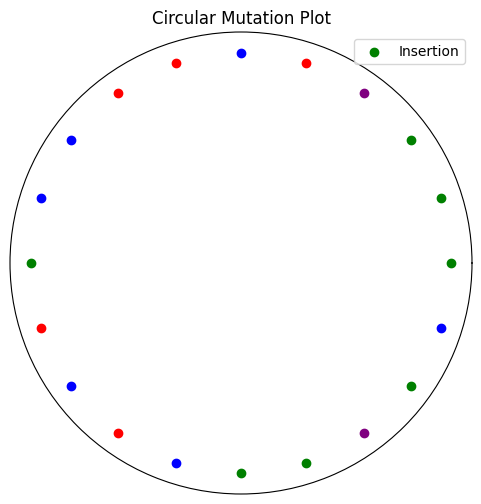

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random positions
num_points = 20
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
radius = 1  # Circle radius

mutation_types = ["SNP", "Insertion", "Deletion", "MNP"]
colors = {"SNP": "blue", "Insertion": "green", "Deletion": "red", "MNP": "purple"}
mutations = np.random.choice(mutation_types, num_points)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})

# Plot mutations
for i, angle in enumerate(angles):
    ax.scatter(angle, radius, color=colors[mutations[i]], label=mutations[i] if i == 0 else "")

# Add circular boundary
ax.set_ylim(0, radius + 0.1)
ax.set_xticks([])
ax.set_yticks([])

plt.title("Circular Mutation Plot")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

df2 = pd.read_csv('data/gwas_database_with_description.csv.gz', compression='gzip', low_memory=False)

In [ ]:
df2['CHR_POS'].isna().sum()

In [ ]:
df2.dropna(subset=['CHR_POS'], inplace=True)

In [ ]:
df2.shape

In [ ]:
df2[['CHR_ID', 'CHR_POS']].to_csv('data/CHR_POS.csv', index=False)

In [ ]:
import pandas as pd


# Function to split and expand rows
def expand_rows(df):
    expanded_rows = []
    
    for index, row in df.iterrows():
        # Ensure 'CHR_POS' is treated as a string
        chr_pos = str(row['CHR_POS'])
        
        # Split 'CHR_POS' by ';' or 'x' (adjust separator as needed)
        positions = chr_pos.replace(' x ', ';').split(';')
        
        # Create a new row for each position and duplicate the other values
        for pos in positions:
            new_row = row.copy()
            new_row['CHR_POS'] = pos
            expanded_rows.append(new_row)
            
            print(new_row)
    
    # Create a new DataFrame from the expanded rows
    return pd.DataFrame(expanded_rows)


In [ ]:
expand_df = expand_rows(df2)

In [ ]:
expand_df

In [ ]:
expand_df[['CHR_ID', 'CHR_POS']].to_csv('data/CHR_POS.csv', index=False)

In [ ]:
#Print CHR_POS if can't be int
print(expand_df[expand_df['CHR_POS'].apply(lambda x: isinstance(x, int))])
#Print CHR_POS if can't be int
#expand_df['CHR_POS'] = expand_df['CHR_POS'].apply(lambda x: int(x) if x.isdigit() else x)


In [ ]:
# Ensure CHR_ID is treated as a string before checking for ';'
expand_df['CHR_ID'] = expand_df['CHR_ID'].apply(lambda x: str(x).split(';')[0] if ';' in str(x) else x)

In [ ]:
expand_df[['CHR_ID', 'CHR_POS']].to_csv('data/CHR_POS.csv', index=False)

In [ ]:
# Iterate through the 'CHR_ID' column using .iloc to access rows by position
for i in range(1, len(expand_df)):
    # Use .iloc[] for positional indexing to avoid issues with custom indices
    current_chr_id = str(expand_df.iloc[i]['CHR_ID'])
    previous_chr_id = str(expand_df.iloc[i - 1]['CHR_ID'])
    
    if ' x ' in current_chr_id and current_chr_id.split(' x ')[0] == previous_chr_id:
        # Split the 'CHR_ID' on ' x ' and keep the second value for the current row
        expand_df.iloc[i, expand_df.columns.get_loc('CHR_ID')] = current_chr_id.split(' x ')[1]

# Ensure the first row keeps the original 'CHR_ID' value
expand_df['CHR_ID'] = expand_df['CHR_ID'].apply(lambda x: str(x).split(' x ')[0] if ' x ' in str(x) else x)

In [ ]:
expand_df['CHR_ID'] = expand_df['CHR_ID'].str.replace('.0', '')
#Add prefix
expand_df['CHR_ID'] = 'chr' + expand_df['CHR_ID'].astype(str)


In [ ]:
expand_df['CHR_ID'].value_counts().sort_index()

In [ ]:
expand_df.shape, df2.shape

In [ ]:
nan_ = []
for i in expand_df['CHR_ID']:
    if i == 'nan':
        nan_.append(i)

In [ ]:
expand_df[['CHR_ID', 'CHR_POS']].to_csv('data/CHR_POS.csv', index=False)

In [ ]:
#drop row nan in CHR_ID
expand_df = expand_df.drop(expand_df[expand_df['CHR_POS'] == 'nan'].index)

In [ ]:
expand_df['CHR_POS'].value_counts()

In [ ]:
expand_df['CHR_ID'].value_counts()

In [ ]:
expand_df['CHR_POS'] = expand_df['CHR_POS'].apply(lambda x: int(x) if isinstance(x, str) and x.isdigit() else x)


In [ ]:
expand_df['CHR_POS'] = pd.to_numeric(expand_df['CHR_POS'], errors='coerce').fillna(0).astype(int)


In [ ]:
expand_df['CHR_POS'].value_counts()

In [ ]:
import pandas as pd


df = pd.read_csv('data/gwas_database_with_description.csv.gz', compression='gzip', low_memory=False)

In [ ]:
df2 = df
# Create list of 'Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description' and NaN
list_of_reprocess = ['Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description']


reprocess = df2[df2['MAPPED_TRAIT_DESCRIPTION'].isin(list_of_reprocess) | df2['MAPPED_TRAIT_DESCRIPTION'].isnull()]['MAPPED_TRAIT_DESCRIPTION'].value_counts()


# Create list of 'Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description' and NaN
list_of_reprocess = ['Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description']


#df2[df2['MAPPED_TRAIT_DESCRIPTION'].isin(list_of_reprocess) | df2['MAPPED_TRAIT_DESCRIPTION'].isnull()]['MAPPED_TRAIT_DESCRIPTION'].value_counts()
# qhat if is not in the list
done = df2[~df2['MAPPED_TRAIT_DESCRIPTION'].isin(list_of_reprocess) | df2['MAPPED_TRAIT_DESCRIPTION'].notnull()]['MAPPED_TRAIT_DESCRIPTION'].value_counts().sum()

In [ ]:
reprocess

In [ ]:
done

In [ ]:
import pandas as pd

def expand_rows(df):
    # Ensure 'CHR_POS' is treated as a string and expand it
    df['CHR_POS'] = df['CHR_POS'].astype(str).str.replace(' x ', ';')
    expanded_df = df.assign(CHR_POS=df['CHR_POS'].str.split(';')).explode('CHR_POS')
    
    return expanded_df

def process_chromosome_ids(df):
    # Ensure 'CHR_ID' is a string and handle ';' separator
    df['CHR_ID'] = df['CHR_ID'].astype(str).str.split(';').str[0]
    
    # Ensure consistent formatting for 'CHR_ID'
    df['CHR_ID'] = df['CHR_ID'].str.split(' x ').str[0]
    df['CHR_ID'] = 'chr' + df['CHR_ID'].str.replace('.0', '', regex=False)
    
    return df

def preprocess_gwas_data(filepath):
    df = pd.read_csv(filepath, compression='gzip', low_memory=False)
    df = expand_rows(df)
    df = process_chromosome_ids(df)
    
    # Convert 'CHR_POS' to numeric, coercing errors to NaN, then filling with 0 and converting to int
    df['CHR_POS'] = pd.to_numeric(df['CHR_POS'], errors='coerce').fillna(0).astype(int)
    
    return df

# Load and process the dataset
df3 = preprocess_gwas_data('data/gwas_database_with_description.csv.gz')


In [36]:
import pandas as pd

df=pd.read_csv('data/gwas_database_with_description_expanded.csv.gz', compression='gzip', low_memory=False)

In [39]:
vcf['CHROM']

0         chr1
1         chr1
2         chr1
3         chr1
4         chr1
          ... 
453466    chrY
453467    chrY
453468    chrY
453469    chrY
453470    chrY
Name: CHROM, Length: 453471, dtype: object

In [38]:
df['CHR_ID'].value_counts()

CHR_ID
chr1     60715
chr6     56368
chr2     55491
chr11    48870
chr3     40360
chr5     34648
chr19    33547
chr12    33085
chr8     32404
chr7     32232
chr4     31730
chr17    28975
chr10    28649
chr9     26497
chr16    26422
chr15    24093
chr20    18181
chr14    17829
chr13    13329
chr18    12868
chr22    10792
chr21     5236
chrX      3220
chrY        32
Name: count, dtype: int64

In [ ]:
df3.to_csv('data/gwas_database_preprocessed.csv', index=False)

In [ ]:
df3['CHR_POS'].value_counts()

In [ ]:
df3['CHR_ID'].value_counts().sum(), df2.shape[0]

In [ ]:
df3.drop(df3[df3['CHR_POS'] == 0].index, inplace=True)

In [7]:
import pandas as pd

df = pd.read_csv('data/gwas_database_with_description.csv.gz', compression='gzip', low_memory=False)

print(df.shape[0])
print(df['CHR_POS'].isnull().sum())
df.dropna(subset=['CHR_POS'], inplace=True)
print(df.shape[0])

import pandas as pd

class ExpandReplicateChr:
    def __init__(self, df):
        self.df = df
    
    def expand_rows(self):
        # Ensure 'CHR_POS' is treated as a string and expand it
        self.df['CHR_POS'] = self.df['CHR_POS'].astype(str).str.replace(' x ', ';')
        expanded_df = self.df.assign(CHR_POS=self.df['CHR_POS'].str.split(';')).explode('CHR_POS')

        return expanded_df

    def process_chromosome_ids(self):
        # Ensure 'CHR_ID' is a string and handle ';' separator
        self.df['CHR_ID'] = self.df['CHR_ID'].astype(str).str.split(';').str[0]

        # Ensure consistent formatting for 'CHR_ID'
        self.df['CHR_ID'] = self.df['CHR_ID'].str.split(' x ').str[0]
        self.df['CHR_ID'] = 'chr' + self.df['CHR_ID'].str.replace('.0', '', regex=False)

        return self.df

    def preprocess_gwas_data(self):
        print ('Missing values have been found:', self.df['CHR_POS'].isnull().sum())
        self.df.dropna(subset=['CHR_POS'], inplace=True)
        print ('Missing values were droped')
        self.df = self.expand_rows()
        print ('Rows were expanded')
        self.df = self.process_chromosome_ids()
        print ('Chromosome IDs were processed')

        # Convert 'CHR_POS' to numeric, coercing errors to NaN, then filling with 0 and converting to int
        self.df['CHR_POS'] = pd.to_numeric(self.df['CHR_POS'], errors='coerce').fillna(0).astype(int)

        return self.df
    

# Load and process the dataset
df = pd.read_csv('data/gwas_database_with_description.csv.gz', compression='gzip', low_memory=False)
expand_replicate_chr = ExpandReplicateChr(df)
df2 = expand_replicate_chr.preprocess_gwas_data()




print(df2.shape[0])


782879
121308
661571
Missing values have been found: 121308
Missing values were droped
Rows were expanded
Chromosome IDs were processed
675573


In [47]:
import pandas as pd

gwas = pd.read_csv('data/gwas_database_with_description.csv.gz', compression='gzip', low_memory=False)

# Create list of 'Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description' and NaN
list_of_reprocess = ['Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description']


gwas[gwas['MAPPED_TRAIT_DESCRIPTION'].isin(list_of_reprocess) | gwas['MAPPED_TRAIT_DESCRIPTION'].isnull()]['MAPPED_TRAIT_DESCRIPTION'].value_counts()

MAPPED_TRAIT_DESCRIPTION
Ontology not covered         20000
Description not available    10369
Description not found         4984
WebDriver error occurred      2326
Name: count, dtype: int64

In [46]:
import pandas as pd

gwas = pd.read_csv('data/gwas_database_with_description.csv.gz', compression='gzip', low_memory=False)

# Create list of 'Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description' and NaN
list_of_reprocess = ['Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description']


gwas[gwas['MAPPED_TRAIT_DESCRIPTION'].isin(list_of_reprocess) | gwas['MAPPED_TRAIT_DESCRIPTION'].isnull()]['MAPPED_TRAIT_DESCRIPTION'].value_counts()

MAPPED_TRAIT_DESCRIPTION
Ontology not covered         20000
Description not available    10369
Description not found         6203
WebDriver error occurred      2134
Name: count, dtype: int64

In [45]:
gwas['MAPPED_TRAIT_URI'].isin(['No URI']).sum(), gwas['MAPPED_TRAIT_DESCRIPTION'].isna().sum()

(np.int64(10369), np.int64(65603))

In [36]:
#gwas[gwas['MAPPED_TRAIT_DESCRIPTION'] == 'Description not found'].loc[:, ['MAPPED_TRAIT_URI']].value_counts(subset='MAPPED_TRAIT_URI')

gwas[gwas['MAPPED_TRAIT_DESCRIPTION'] == 'Ontology not covered']['MAPPED_TRAIT_URI'].str.split('/').str[-1].str.split('_').str[0].value_counts()

MAPPED_TRAIT_URI
OBA     19826
PATO      162
NCIT       12
Name: count, dtype: int64

In [20]:
import pandas as pd

gwas = pd.read_csv('data/gwas_database_with_description.csv.gz', compression='gzip', low_memory=False)

# Create list of 'Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description' and NaN
list_of_reprocess = ['Ontology not covered', 'Description not available', 'Description not found', 'WebDriver error occurred', 'Error fetching description']


gwas[gwas['MAPPED_TRAIT_DESCRIPTION'].isin(list_of_reprocess) | gwas['MAPPED_TRAIT_DESCRIPTION'].isnull()]['MAPPED_TRAIT_DESCRIPTION'].value_counts()

MAPPED_TRAIT_DESCRIPTION
Ontology not covered         20000
Description not available    10369
Description not found         8154
WebDriver error occurred      1443
Name: count, dtype: int64

In [4]:
df2['CHR_POS'].value_counts()

CHR_POS
0            121308
28367840       1937
27508073       1552
116778201      1302
56815721        999
              ...  
153914397         1
73718726          1
88579655          1
28742564          1
43807209          1
Name: count, Length: 322214, dtype: int64

In [47]:
import pandas as pd

result = pd.read_csv('test/report/data/report_data.csv')

In [48]:
result['Groups of Disease/Trait'].value_counts()

Groups of Disease/Trait
Other trait                         149
Hematological measurement            22
Lipid or lipoprotein measurement     21
Cardiovascular disease               21
Immune system disease                19
Other disease                        16
Liver enzyme measurement             15
Nervous system disease               15
Body measurement                     14
Cancer                                9
Digestive system disease              5
Metabolic disease                     5
Response to drug                      4
Cardiovascular measurement            3
Other measurement                     2
Mental disorder                       1
Name: count, dtype: int64

In [49]:
#plot the data
import plotly.express as px

fig = px.bar(result['Groups of Disease/Trait'].value_counts(), x=result['Groups of Disease/Trait'].value_counts().index, y=result['Groups of Disease/Trait'].value_counts().values, title='Groups of Disease/Trait')

# Update the layout
fig.update_layout(
    xaxis_title="Groups of Disease/Trait",
    yaxis_title="Count",
    title="Groups of Disease/Trait",
    showlegend=False
)

# transparent background

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)
fig.show()

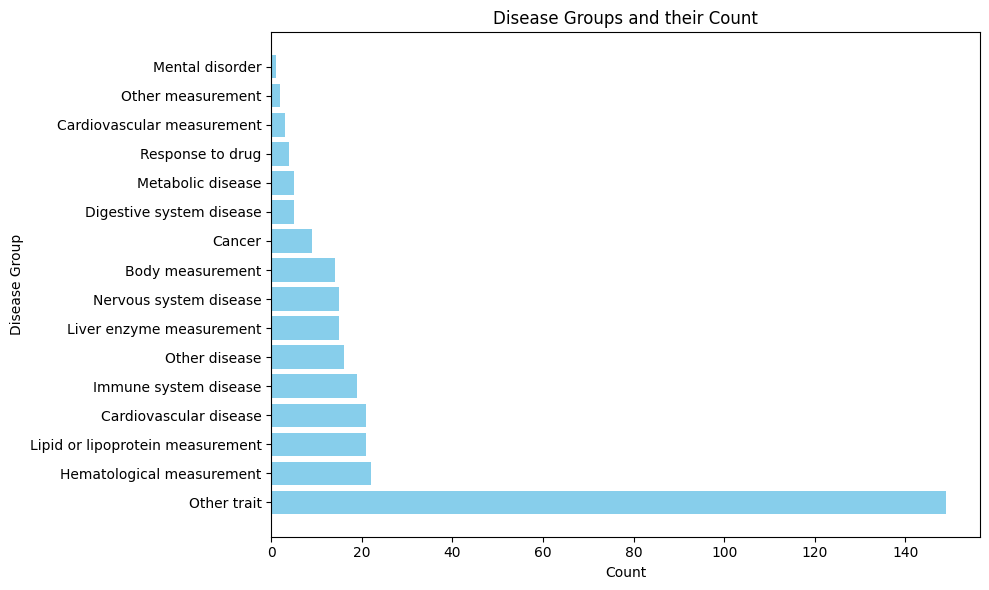

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Prepare the data
data = {
    'Disease Group': ['Other trait', 'Hematological measurement', 'Lipid or lipoprotein measurement', 
                      'Cardiovascular disease', 'Immune system disease', 'Other disease', 
                      'Liver enzyme measurement', 'Nervous system disease', 'Body measurement', 
                      'Cancer', 'Digestive system disease', 'Metabolic disease', 'Response to drug', 
                      'Cardiovascular measurement', 'Other measurement', 'Mental disorder'],
    'Count': [149, 22, 21, 21, 19, 16, 15, 15, 14, 9, 5, 5, 4, 3, 2, 1]
}

# Step 2: Create a DataFrame
df = pd.DataFrame(data)

# Step 3: Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df['Disease Group'], df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Disease Group')
plt.title('Disease Groups and their Count')

# Display the plot
plt.tight_layout()
plt.show()
